In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Loading the [Codon usage Data Set](https://archive.ics.uci.edu/ml/datasets/Codon+usage).

**Attribute Information:**
<br>
Column 1: Kingdom<br>
Column 2: DNAtype<br>
Column 3: SpeciesID<br>
Column 4: Ncodons<br>
Column 5: SpeciesName<br>
Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number))

In [2]:
df = pd.read_csv('data/codon_usage.csv')
df

/home/elisio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


It was observed that the rows 486 and 5063 have a string in the features UUC and UUU respectively. Therefore, they'll be removed from the dataframe.

In [3]:
df.drop([486, 5063], inplace=True)

It's necessary to reset the index of the dataframe to avoid problems later.

In [4]:
df.reset_index(drop=True, inplace=True)

To help the analysis let's have a separate dataframe for the numerical features.

In [5]:
df_codons = df.drop(columns=['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName'])
df_codons

,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,0.01459,0.03920,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13022,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,0.03096,0.06386,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13023,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,0.02728,0.06643,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13024,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,0.01600,0.02082,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## t-SNE (t-distributed Stochastic Neighbor Embedding)

t-SNE is a statistical method for visualizing high-dimensional data. Instead of a distance metric it uses the KL divergence (Kullback–Leibler divergence).
<br><br>
First let's apply t-SNE to visualize the data.
[sklearn t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=t%20sne#sklearn.manifold.TSNE)

In [6]:
t = TSNE(learning_rate=200)
tsne_features = t.fit_transform(df_codons)

After finished the high-dimensional dataset is projected in 2 arrays.

In [7]:
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

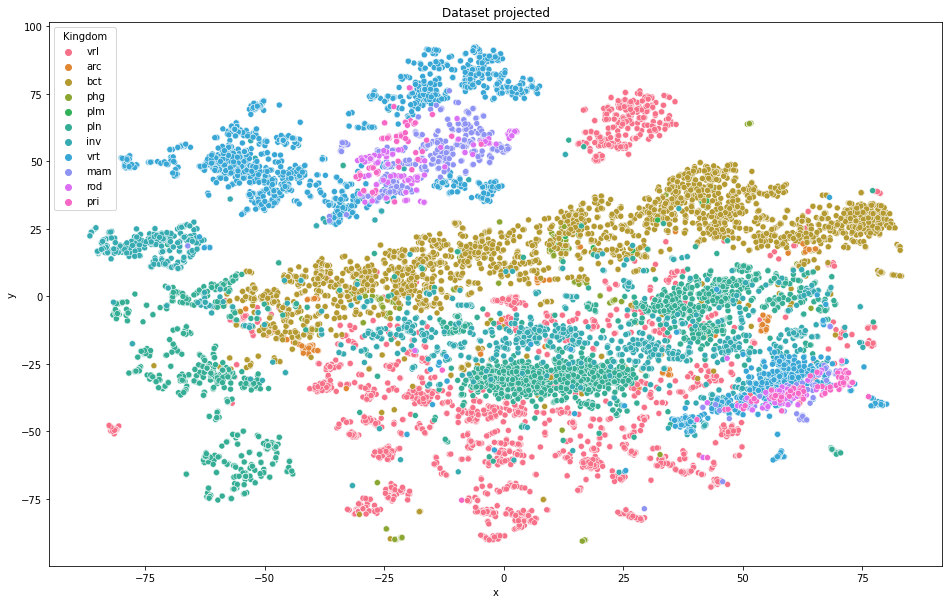

In [8]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="x", y="y", hue='Kingdom', data=df)
plt.title('Dataset projected')
plt.show()

## PCA (Principal Component Analysis)

Our objective is to use PCA to reduce the number of features.
[sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA)

Then we center and scale the data. That way for each codon the mean is 0 and the standard deviation is 1.
<br>
The dataframe has to be the transposed because the way the scale works. One can verify if it was applied on the right dimensions by the shape of the PCA resulting components (components_ attribute).

In [9]:
df_scaled = preprocessing.scale(df_codons.T)

Finally, run PCA. The number of components chosen, 5, is arbitrary.

In [10]:
pca = PCA(n_components=4)

In [11]:
pca.fit(df_scaled)

PCA(n_components=4)

As can be seen above, we have now 4 features for each gene.

In [12]:
pca.components_.shape

(4, 13026)

The variance explained by each of the 5 components is displayed below.

In [13]:
pca.explained_variance_ratio_

array([0.33974367, 0.21315012, 0.13354412, 0.04124218])

The variance explained by the sum of the 5 components is 75.4% as can be seen below.
<br>
The number of components can be increased in order to increase the explained variance.

In [14]:
np.sum(pca.explained_variance_ratio_)

0.7276801015310204

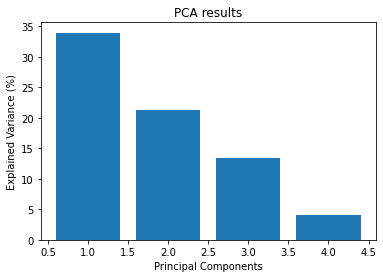

In [15]:
pca_comp = pca.explained_variance_ratio_ * 100
pca_comp = np.round(pca_comp, decimals=2)

plt.bar(x=range(1, len(pca_comp)+1), height=pca_comp)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.title('PCA results')
plt.show()

### Visualising the PCA using t-SNE 

In [16]:
df_pca = pd.DataFrame(pca.components_.T)
df_pca

,0,1,2,3
0,0.001987,-0.015132,0.002063,-0.005711
1,0.003375,-0.014273,0.002529,-0.005187
2,0.010463,-0.002225,-0.007556,-0.014461
3,0.011745,-0.001051,-0.003855,-0.011657
4,0.010933,-0.002668,-0.011757,-0.001661
...,...,...,...,...
13021,0.007337,-0.008779,0.000565,-0.009792
13022,0.003903,-0.000735,0.021577,-0.002830
13023,0.003218,-0.000795,0.021399,-0.003311
13024,0.008148,-0.012964,-0.000941,-0.004410


In [17]:
df_pca_f = pd.concat([df['Kingdom'], df_pca], axis=1)

In [18]:
t = TSNE(learning_rate=200)

In [19]:
tsne_features = t.fit_transform(df_pca)

In [20]:
df_pca_f['x'] = tsne_features[:, 0]
df_pca_f['y'] = tsne_features[:, 1]

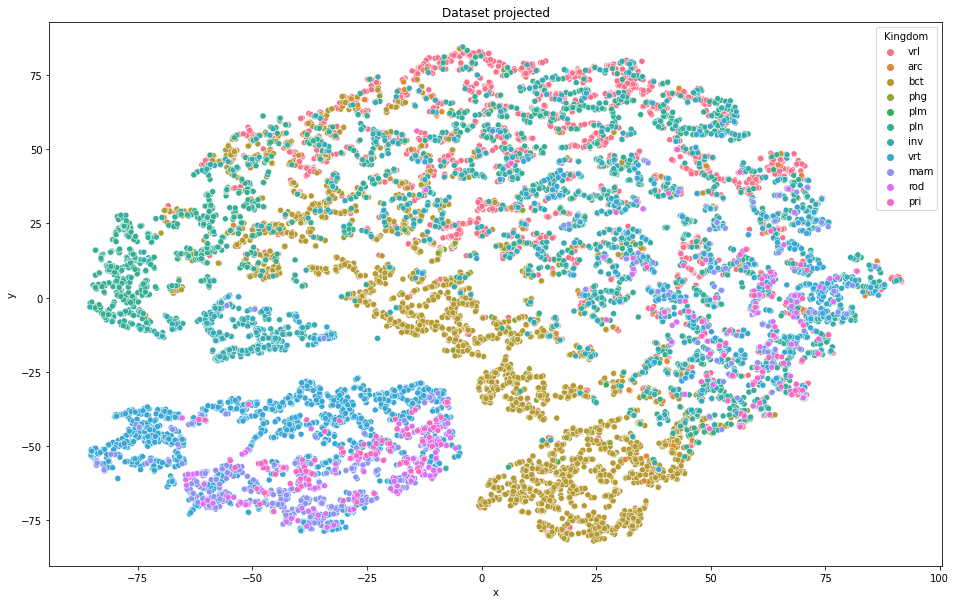

In [21]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="x", y="y", hue='Kingdom', data=df_pca_f)
plt.title('Dataset projected')
plt.show()

---
---

In [22]:
%load_ext watermark
%watermark -iv -v -nuw

Last updated: Sun Aug 15 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas    : 1.2.4
seaborn   : 0.11.1
sklearn   : 0.24.2
matplotlib: 3.4.2
numpy     : 1.18.5

Watermark: 2.1.0

